# Signals Processing Exercises

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 20})

### Exercise

Generate a 10-second random signal with 0.01 second sampling interval and plot it. (Tip: you should use [np.random.random()](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html) function)

Is the signal continuous or discrete?  Analog or digital?

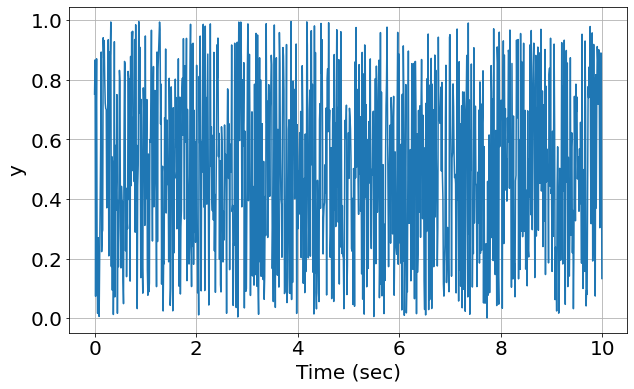

In [ ]:
n_sec = 10                        
n_points = 100                                           

t = np.arange(n_sec * n_points)/n_points    
y = np.random.random((n_points * n_sec,))                       
                        

# PLOT
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.grid()

Answer: The signal is discrete and digital. Any signal comprised of finite number of samples is discrete. And because signal values are stored in a finite number of bits, their magnitudes can only assume a finite set of possible values.

### ECG Example
The file ecg.txt contains 15000 data points of ECG data, sampled at 1000 Hz.  Plot the signal with appropriate time axis.

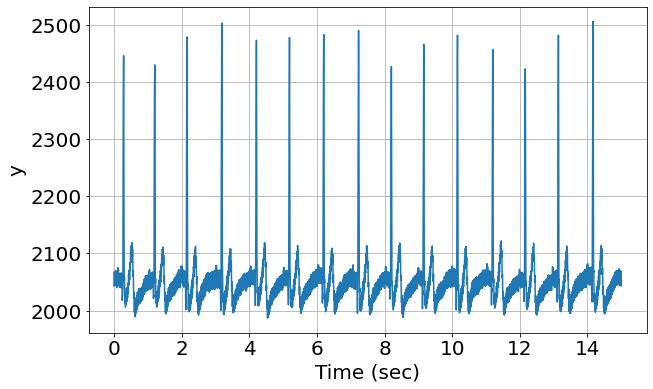

In [ ]:
# Load the ECG example data
ecg_url = 'https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week2/ecg.txt'
ecg_microvolts = np.loadtxt(ecg_url,skiprows=4)

# write code here

n_sec = 15000/1000                        
n_points = 1000                                          

t = np.arange(n_sec * n_points)/n_points    

# PLOT
plt.figure(figsize=(10,6))
plt.plot(t,ecg_microvolts)
plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.grid()

__Question__

Estimate frequency and amplitude of the above ECG signal (NOT using code!)

__Answer__

Frequency = 1
Amplitude = 250

__Exercise__

Generate and plot a sinusoidal signal with frequency 0.2 HZ and amplitude of 1.5.

(-2.0, 2.0)

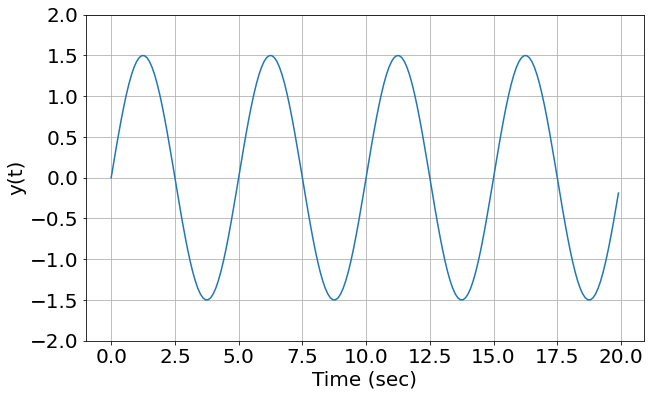

In [ ]:
# write code here

t = np.arange(0, 20, 0.1)
f=0.2
a=1.5
w= 2*np.pi*f

y = a*np.sin(w*t) 

plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y(t)')
plt.grid()
plt.ylim([-2,2])

__Exercise__

Consider the signal shown below (the sum of two sinusoids) for this question. How many points do you need in your subsample to completely determine the signal? What frequencies do you have in your signal?

(-2.0, 2.0)

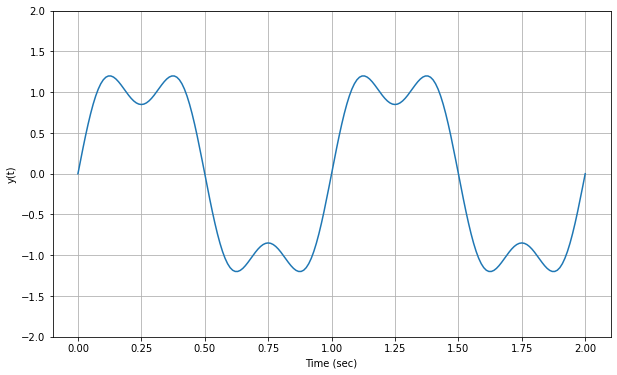

In [ ]:
t = np.linspace(0,2,201)
y = (4/np.pi)*np.sin(2*np.pi*t) + (4/(3*np.pi))*np.sin(6*np.pi*t)

plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y(t)')
plt.grid()
plt.ylim([-2,2])

__Answer__

The frequencies in the signal are 1.0 Hz and 3.0 Hz, so we would need a sampling frequency of at least 6.0 Hz. That means at least 12 points in our subsample.

__Exercise__

Plot the peaks from the ECG signal. You can take a look at scipy.signal's documentation for [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html#scipy.signal.find_peaks)

In [ ]:
type(find_peaks(ecg_microvolts))

tuple

In [ ]:
find_peaks(ecg_microvolts)[1]

{}

In [ ]:
peaks, _ = find_peaks(ecg_microvolts)


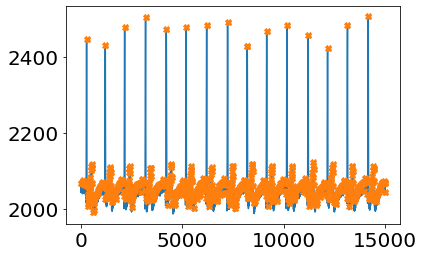

In [ ]:
# Load the ECG example data
ecg_url = 'https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week2/ecg.txt'
ecg_microvolts = np.loadtxt(ecg_url,skiprows=4)

# Import the `find_peaks` function
from scipy.signal import find_peaks

# write code here

t = np.arange(0,15000)
peaks, _ = find_peaks(ecg_microvolts)
plt.plot(t, ecg_microvolts)
plt.plot(t[peaks], ecg_microvolts[peaks], 'X')


__Exercise__

1. Generate 5 sine waves with frequencies and amplitudes set based on two user-defined lists and sum them into one signal.
2. Plot the 5 original sine waves and the combined signal.
3. Plot x markers at the peaks of the waves using find_peaks

In [ ]:
#type(combined)
combined = np.zeros(len(t))
combined
t = np.arange(0, 5, 0.1)
t

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [ ]:
# write code here

def sum_sine_waves(freq, amp):
    t = np.arange(0, 5, 0.01)
    #waves = []
    #peaks = []
    combined = np.zeros(len(t))
    for i in range(0,5):
        w = amp[i]*np.sin(freq[i]*2*np.pi*t)
        #waves.append(w)
        p, _ = find_peaks(w)
        #peaks.append(p)
        combined += w
        plt.plot(t, w)
        plt.plot(t[p], w[p], 'X')
    peak_com, _ = find_peaks(combined)
    plt.plot(t, combined)
    plt.plot(t[peak_com], combined[peak_com], 'X')
    plt.show



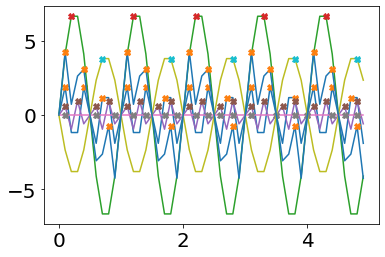

In [ ]:
test_freq = [3, 1, 4, 5, 9]
test_amp = [2, 7, 1, 8, 4]
sum_sine_waves(test_freq, test_amp)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 

<function matplotlib.pyplot.show(close=None, block=None)>

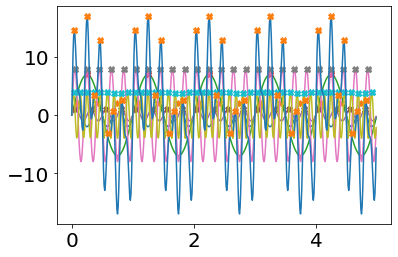

In [ ]:
freq = [3, 1, 4, 5, 9]
amp = [2, 7, 1, 8, 4]
t = np.arange(0, 5, 0.01)
#waves = []
#peaks = []
combined = np.zeros(len(t))
print(t)
for i in range(0,5):
    w = amp[i]*np.sin(freq[i]*2*np.pi*t)
    #waves.append(w)
    p, _ = find_peaks(w)
    #peaks.append(p)
    #if (i==0):
    #    print(p)
    combined += w
    plt.plot(t, w)
    plt.plot(t[p], w[p], 'X')
peak_com, _ = find_peaks(combined)
plt.plot(t, combined)
plt.plot(t[peak_com], combined[peak_com], 'X')
plt.show
#sum_sine_waves(test_freq, test_amp)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3d82bae0-f509-4ec0-92dc-a9b1bbc77ba9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>